# DATASET OVERVIEW

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Data Loading and Basic Information
print("=== HDB Resale Price Data Analysis ===")
print("\n1. Data Loading and Basic Information")

# Load data
df = pd.read_csv('train.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset contains {df.shape[0]} records and {df.shape[1]} features")

# Display first few rows
print("\nFirst 5 rows of data:")
print(df.head())

# Basic data information
print("\nBasic data information:")
print(df.info())

# Descriptive statistics
print("\nDescriptive statistics for numerical features:")
print(df.describe())

# Check missing values
print("\nMissing values analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])


=== HDB Resale Price Data Analysis ===

1. Data Loading and Basic Information
Dataset shape: (162691, 11)
Dataset contains 162691 records and 11 features

First 5 rows of data:
     MONTH           TOWN FLAT_TYPE BLOCK              STREET FLOOR_RANGE  \
0  2020-10      woodlands    4 room  681B  woodlands drive 62    07 to 09   
1  2021-07         bishan    4 room   264    bishan street 24    07 to 09   
2  2021-05  bukit panjang    4 room   520       jelapang road    19 to 21   
3  2021-08        punggol    4 room  121B     edgedale plains    16 to 18   
4  2023-05        hougang    5 room  997B   Buangkok Crescent    10 to 12   

   FLOOR_AREA_SQM         FLAT_MODEL   ECO_CATEGORY  LEASE_COMMENCE_DATA  \
0           102.0  premium apartment  uncategorized                 2000   
1           104.0            model a  uncategorized                 1992   
2           102.0            model a  uncategorized                 1998   
3            93.0            model a  uncategorized     

# EDA

## 2.1 data distribution



=== 2. Exploratory Data Analysis (EDA) ===


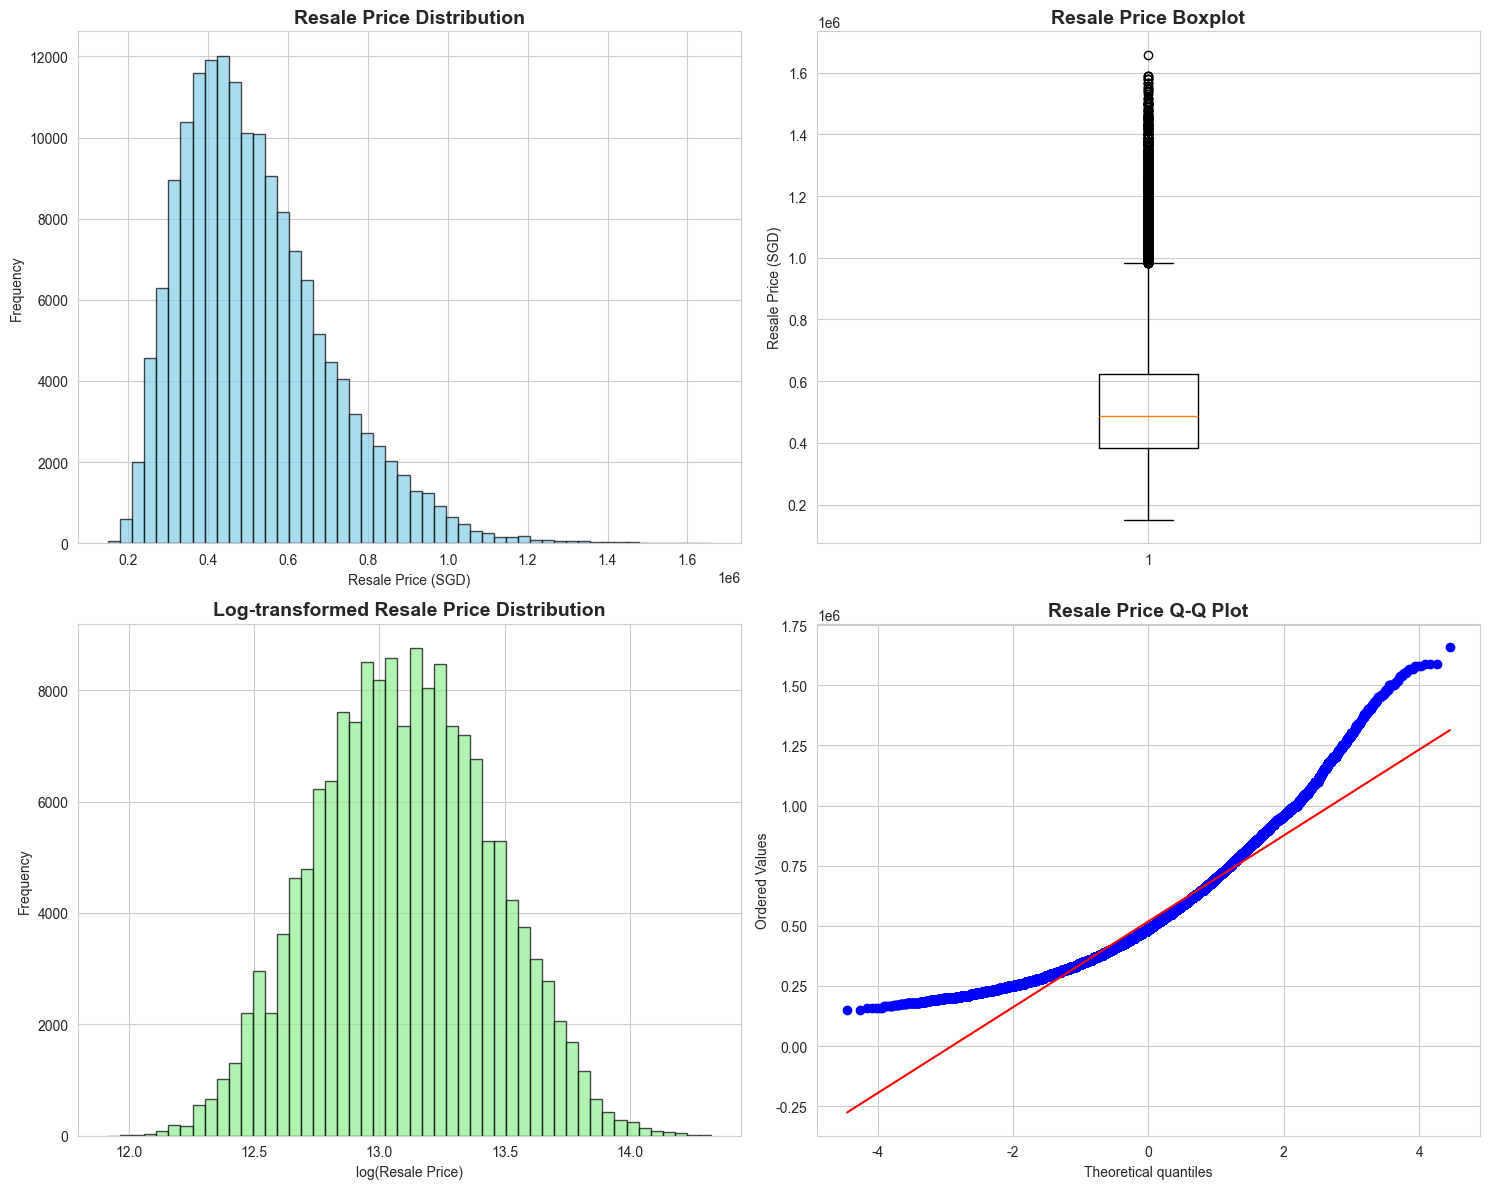


Resale Price Statistics:
Mean price: $518,843.00
Median price: $488,000.00
Minimum price: $150,000.00
Maximum price: $1,658,888.00
Standard deviation: $183,244.25


In [7]:
# 2. Exploratory Data Analysis (EDA) - Targeting Resale Price
print("\n\n=== 2. Exploratory Data Analysis (EDA) ===")

# 2.1 Resale Price Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Resale price histogram
axes[0,0].hist(df['RESALE_PRICE'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Resale Price Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Resale Price (SGD)')
axes[0,0].set_ylabel('Frequency')

# Resale price boxplot
axes[0,1].boxplot(df['RESALE_PRICE'])
axes[0,1].set_title('Resale Price Boxplot', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Resale Price (SGD)')

# Log-transformed price distribution
log_prices = np.log(df['RESALE_PRICE'])
axes[1,0].hist(log_prices, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Log-transformed Resale Price Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('log(Resale Price)')
axes[1,0].set_ylabel('Frequency')

# Q-Q plot for normality test
from scipy import stats
stats.probplot(df['RESALE_PRICE'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Resale Price Q-Q Plot', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Basic price statistics
print(f"\nResale Price Statistics:")
print(f"Mean price: ${df['RESALE_PRICE'].mean():,.2f}")
print(f"Median price: ${df['RESALE_PRICE'].median():,.2f}")
print(f"Minimum price: ${df['RESALE_PRICE'].min():,.2f}")
print(f"Maximum price: ${df['RESALE_PRICE'].max():,.2f}")
print(f"Standard deviation: ${df['RESALE_PRICE'].std():,.2f}")


Analysis of Price Distribution 
- The resale price distribution shows a right-skewed pattern with most properties concentrated in the $300K-$600K range.
- The presence of outliers above $1M suggests premium properties in prime locations or larger units."
- The log transformation reveals a more normal distribution, indicating that log-transformation might be beneficial for modeling.
- The Q-Q plot confirms the non-normal distribution of raw prices, supporting the need for transformation in predictive modeling.

##  2.2 Price Analysis by Different Features


2.2 Price Analysis by Different Features
clean flat type
before: ['4-room' '5-room' '3-room' 'executive' '2-room' '1-room'
 'multi generation']
after: ['4-room' '5-room' '3-room' 'executive' '2-room' '1-room'
 'multi generation']


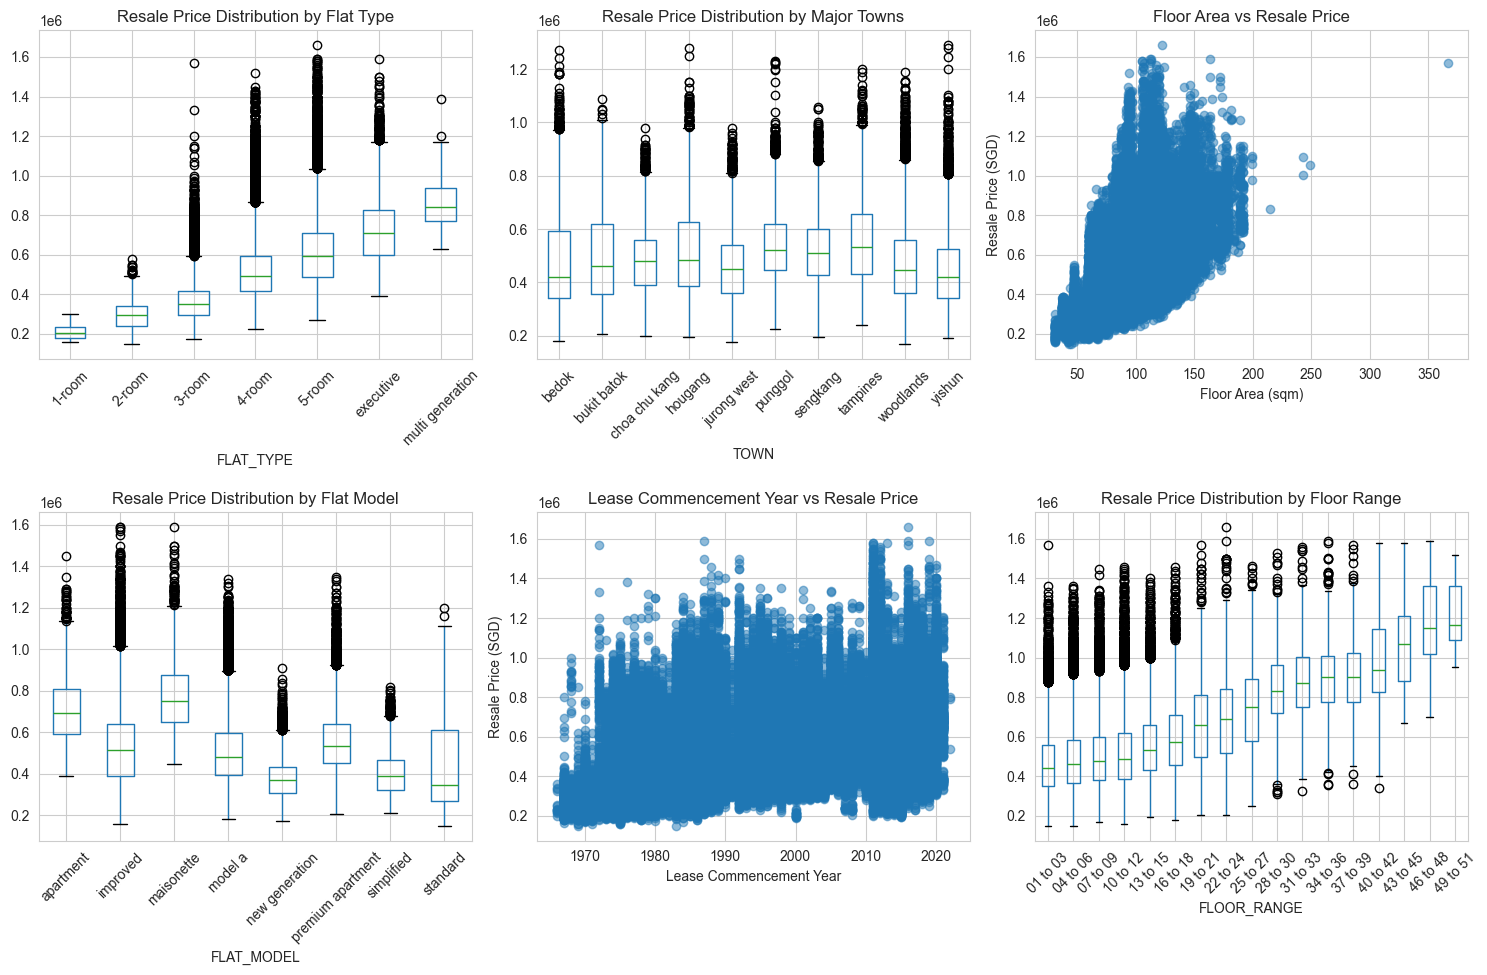

In [15]:
# 2.2 Price Analysis by Different Features
print("\n2.2 Price Analysis by Different Features")

# Analysis by flat type
# Data cleaning for flat type - standardize "x room" and "x-room" formats
print("clean flat type")
print(f"before: {df['FLAT_TYPE'].unique()}")

# Standardize flat type naming - convert "x room" to "x-room" format
df['FLAT_TYPE'] = df['FLAT_TYPE'].str.replace(' room', '-room', case=False)
df['FLAT_TYPE'] = df['FLAT_TYPE'].str.replace(' ROOM', '-ROOM', case=False)

print(f"after: {df['FLAT_TYPE'].unique()}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df.boxplot(column='RESALE_PRICE', by='FLAT_TYPE', ax=plt.gca())
plt.title('Resale Price Distribution by Flat Type')
plt.suptitle('')
plt.xticks(rotation=45)

# Analysis by town (top 10 towns)
plt.subplot(2, 3, 2)
top_towns = df['TOWN'].value_counts().head(10).index
df_top_towns = df[df['TOWN'].isin(top_towns)]
df_top_towns.boxplot(column='RESALE_PRICE', by='TOWN', ax=plt.gca())
plt.title('Resale Price Distribution by Major Towns')
plt.suptitle('')
plt.xticks(rotation=45)

# Analysis by floor area
plt.subplot(2, 3, 3)
plt.scatter(df['FLOOR_AREA_SQM'], df['RESALE_PRICE'], alpha=0.5)
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD)')
plt.title('Floor Area vs Resale Price')

# Analysis by flat model
plt.subplot(2, 3, 4)
top_models = df['FLAT_MODEL'].value_counts().head(8).index
df_top_models = df[df['FLAT_MODEL'].isin(top_models)]
df_top_models.boxplot(column='RESALE_PRICE', by='FLAT_MODEL', ax=plt.gca())
plt.title('Resale Price Distribution by Flat Model')
plt.suptitle('')
plt.xticks(rotation=45)

# Analysis by lease commencement year
plt.subplot(2, 3, 5)
plt.scatter(df['LEASE_COMMENCE_DATA'], df['RESALE_PRICE'], alpha=0.5)
plt.xlabel('Lease Commencement Year')
plt.ylabel('Resale Price (SGD)')
plt.title('Lease Commencement Year vs Resale Price')

# Analysis by floor range
plt.subplot(2, 3, 6)
df.boxplot(column='RESALE_PRICE', by='FLOOR_RANGE', ax=plt.gca())
plt.title('Resale Price Distribution by Floor Range')
plt.suptitle('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Analysis of Price by Features ---
- Flat Type: need data cleaning
- Location: quite average?
- Floor Area: Strong positive correlation between floor area and price, as expected for larger living spaces.
- Flat Model: apartment & maisonette shows premium price.
- Building Age: Newer buildings (higher lease commencement years) generally command higher prices, though location matters more.
- Floor Level: Higher floors tend to have slightly higher prices, likely due to better views and less noise.


2.3 Numerical Features Correlation Analysis


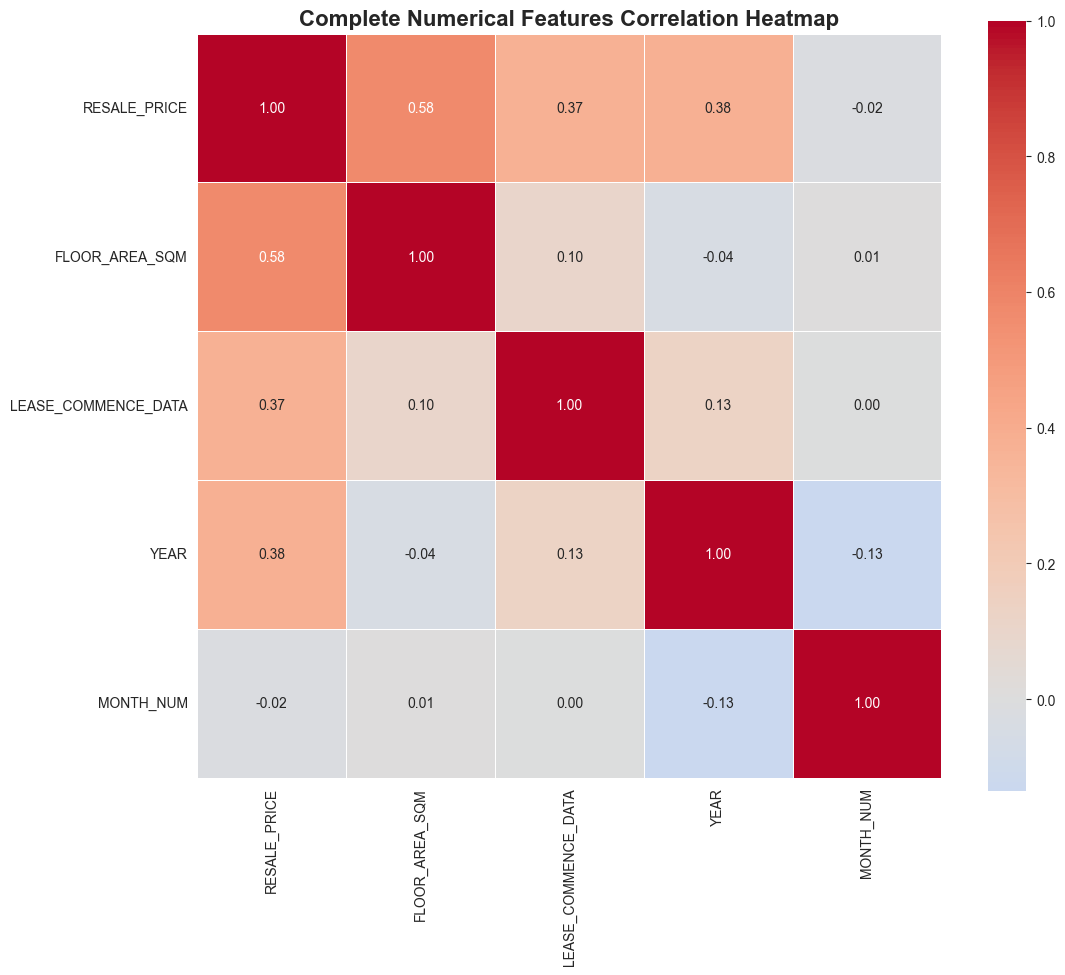

Correlation Matrix:
                     RESALE_PRICE  FLOOR_AREA_SQM  LEASE_COMMENCE_DATA  \
RESALE_PRICE             1.000000        0.578110             0.368591   
FLOOR_AREA_SQM           0.578110        1.000000             0.099533   
LEASE_COMMENCE_DATA      0.368591        0.099533             1.000000   
YEAR                     0.382053       -0.042396             0.129709   
MONTH_NUM               -0.017999        0.005404             0.000948   

                         YEAR  MONTH_NUM  
RESALE_PRICE         0.382053  -0.017999  
FLOOR_AREA_SQM      -0.042396   0.005404  
LEASE_COMMENCE_DATA  0.129709   0.000948  
YEAR                 1.000000  -0.134518  
MONTH_NUM           -0.134518   1.000000  

--- Analysis of Correlations ---


In [19]:
# 2.3 Correlation Analysis
print("\n2.3 Numerical Features Correlation Analysis")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

# 重新排序列，使RESALE_PRICE位于对角线上（第一列和第一行）
if 'RESALE_PRICE' in correlation_matrix.columns:
    cols_reordered = ['RESALE_PRICE'] + [col for col in correlation_matrix.columns if col != 'RESALE_PRICE']
    correlation_matrix = correlation_matrix.loc[cols_reordered, cols_reordered]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Complete Numerical Features Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

print("\n--- Analysis of Correlations ---")



2.4 Time Trend Analysis


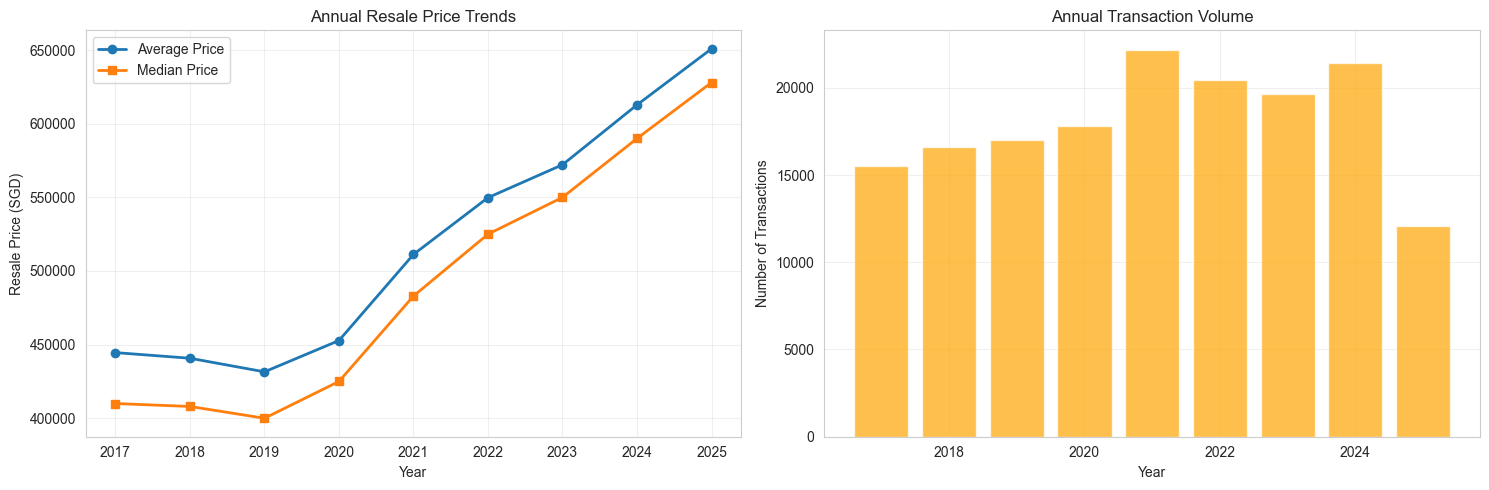


--- Analysis of Time Trends ---
Price trends show significant appreciation over the years, with both mean and median prices rising consistently.
The gap between mean and median prices indicates the presence of high-value outliers affecting the average.
Transaction volumes vary by year, with some years showing higher market activity than others.
The upward price trend reflects Singapore's robust property market and inflation effects over time.
Future projections (2024-2025) in the dataset suggest continued price appreciation, though these should be validated.


In [16]:
# 2.3 Time Trend Analysis
print("\n2.4 Time Trend Analysis")
df['YEAR'] = df['MONTH'].str[:4].astype(int)
df['MONTH_NUM'] = df['MONTH'].str[5:].astype(int)

# Annual price trend analysis
yearly_price = df.groupby('YEAR')['RESALE_PRICE'].agg(['mean', 'median', 'count']).reset_index()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(yearly_price['YEAR'], yearly_price['mean'], marker='o', linewidth=2, label='Average Price')
plt.plot(yearly_price['YEAR'], yearly_price['median'], marker='s', linewidth=2, label='Median Price')
plt.xlabel('Year')
plt.ylabel('Resale Price (SGD)')
plt.title('Annual Resale Price Trends')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(yearly_price['YEAR'], yearly_price['count'], alpha=0.7, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Annual Transaction Volume')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n--- Analysis of Time Trends ---")
print("Price trends show significant appreciation over the years, with both mean and median prices rising consistently.")
print("The gap between mean and median prices indicates the presence of high-value outliers affecting the average.")
print("Transaction volumes vary by year, with some years showing higher market activity than others.")
print("The upward price trend reflects Singapore's robust property market and inflation effects over time.")
print("Future projections (2024-2025) in the dataset suggest continued price appreciation, though these should be validated.")



=== 3. Data Preprocessing and Feature Engineering ===
3.1 Missing Values Handling
No missing values detected in the dataset - no imputation required.

3.2 Feature Engineering
New features created:
- TRANSACTION_YEAR, TRANSACTION_MONTH: Extracted from MONTH
- BUILDING_AGE: Age of building at time of sale
- FLOOR_LEVEL_LOW, FLOOR_LEVEL_HIGH, FLOOR_LEVEL_MID: Floor level information
- PRICE_PER_SQM: Price per square meter
- Standardized categorical features

3.3 Categorical Variables Encoding
Original dataset shape: (162691, 23)
After one-hot encoding shape: (162691, 68)
Number of new dummy variables created: 45

3.4 Feature Scaling and Normalization
Scaling completed for numerical features:
- Standard scaling (mean=0, std=1)
- Min-Max normalization (range 0-1)

3.5 Outlier Detection and Treatment
RESALE_PRICE: 2902 outliers detected (bounds: 22000.00 - 982000.00)
FLOOR_AREA_SQM: 914 outliers detected (bounds: 37.00 - 157.00)
PRICE_PER_SQM: 6262 outliers detected (bounds: 1548.55 - 8881

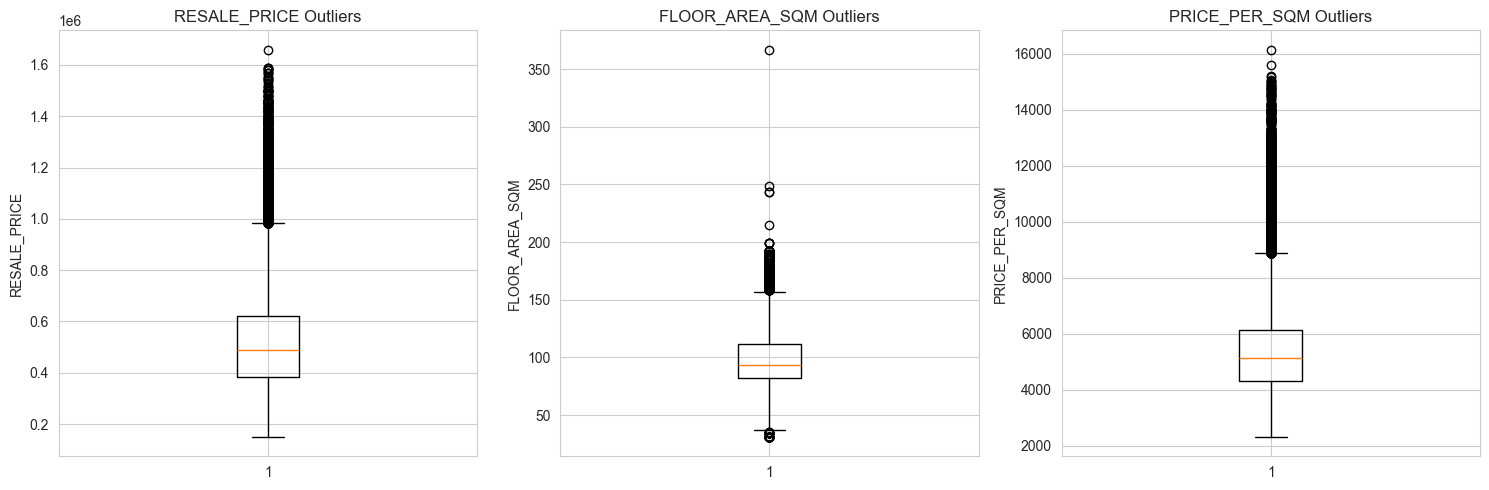


--- Analysis of Data Preprocessing and Feature Engineering ---
Feature Engineering: Successfully created meaningful derived features including building age, floor levels, and price per sqm.
These new features provide additional insights and may improve model performance by capturing non-linear relationships.
Categorical Encoding: Applied appropriate encoding strategies - label encoding for ordinal data and one-hot encoding for nominal data.
The significant increase in dimensions after one-hot encoding suggests the need for dimensionality reduction techniques.
Feature Scaling: Both standard scaling and min-max normalization were applied to handle different scales across numerical features.
Outlier Detection: Identified outliers in key features, particularly in resale prices and price per sqm, which may represent luxury properties.
The preprocessing pipeline prepares the data effectively for machine learning algorithms while preserving important information.

Final processed dataset sha

In [20]:
# 3. Data Preprocessing and Feature Engineering
print("\n\n=== 3. Data Preprocessing and Feature Engineering ===")

# Create a copy for preprocessing
df_processed = df.copy()

# 3.1 Handle Missing Values (already confirmed no missing values)
print("3.1 Missing Values Handling")
print("No missing values detected in the dataset - no imputation required.")

# 3.2 Feature Engineering
print("\n3.2 Feature Engineering")

# Extract year and month from MONTH column
df_processed['TRANSACTION_YEAR'] = df_processed['MONTH'].str[:4].astype(int)
df_processed['TRANSACTION_MONTH'] = df_processed['MONTH'].str[5:].astype(int)

# Calculate building age at time of sale
df_processed['BUILDING_AGE'] = df_processed['TRANSACTION_YEAR'] - df_processed['LEASE_COMMENCE_DATA']

# Extract floor level information
df_processed['FLOOR_LEVEL_LOW'] = df_processed['FLOOR_RANGE'].str.split(' to ').str[0].astype(int)
df_processed['FLOOR_LEVEL_HIGH'] = df_processed['FLOOR_RANGE'].str.split(' to ').str[1].astype(int)
df_processed['FLOOR_LEVEL_MID'] = (df_processed['FLOOR_LEVEL_LOW'] + df_processed['FLOOR_LEVEL_HIGH']) / 2

# Create price per sqm feature
df_processed['PRICE_PER_SQM'] = df_processed['RESALE_PRICE'] / df_processed['FLOOR_AREA_SQM']

# Create categorical features for analysis
df_processed['FLAT_TYPE_CATEGORY'] = df_processed['FLAT_TYPE'].str.replace('-', ' ').str.title()
df_processed['TOWN_CATEGORY'] = df_processed['TOWN'].str.title()

print("New features created:")
print("- TRANSACTION_YEAR, TRANSACTION_MONTH: Extracted from MONTH")
print("- BUILDING_AGE: Age of building at time of sale")
print("- FLOOR_LEVEL_LOW, FLOOR_LEVEL_HIGH, FLOOR_LEVEL_MID: Floor level information")
print("- PRICE_PER_SQM: Price per square meter")
print("- Standardized categorical features")

# 3.3 Categorical Variables Encoding
print("\n3.3 Categorical Variables Encoding")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Label encoding for ordinal variables
le_flat_type = LabelEncoder()
df_processed['FLAT_TYPE_ENCODED'] = le_flat_type.fit_transform(df_processed['FLAT_TYPE'])

# One-hot encoding for nominal variables
categorical_features = ['TOWN', 'FLAT_MODEL', 'ECO_CATEGORY']
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, prefix=categorical_features)

print(f"Original dataset shape: {df_processed.shape}")
print(f"After one-hot encoding shape: {df_encoded.shape}")
print(f"Number of new dummy variables created: {df_encoded.shape[1] - df_processed.shape[1]}")

# 3.4 Feature Scaling and Normalization
print("\n3.4 Feature Scaling and Normalization")

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features for scaling
numerical_features = ['FLOOR_AREA_SQM', 'LEASE_COMMENCE_DATA', 'BUILDING_AGE', 
                     'FLOOR_LEVEL_MID', 'TRANSACTION_YEAR']

# Standard scaling
scaler_standard = StandardScaler()
df_processed[['FLOOR_AREA_SQM_SCALED', 'LEASE_COMMENCE_DATA_SCALED', 
              'BUILDING_AGE_SCALED', 'FLOOR_LEVEL_MID_SCALED', 
              'TRANSACTION_YEAR_SCALED']] = scaler_standard.fit_transform(df_processed[numerical_features])

# Min-Max scaling
scaler_minmax = MinMaxScaler()
df_processed[['FLOOR_AREA_SQM_NORM', 'LEASE_COMMENCE_DATA_NORM', 
              'BUILDING_AGE_NORM', 'FLOOR_LEVEL_MID_NORM', 
              'TRANSACTION_YEAR_NORM']] = scaler_minmax.fit_transform(df_processed[numerical_features])

print("Scaling completed for numerical features:")
print("- Standard scaling (mean=0, std=1)")
print("- Min-Max normalization (range 0-1)")

# 3.5 Outlier Detection and Treatment
print("\n3.5 Outlier Detection and Treatment")

# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in key features
outlier_features = ['RESALE_PRICE', 'FLOOR_AREA_SQM', 'PRICE_PER_SQM']
for feature in outlier_features:
    outliers, lower, upper = detect_outliers_iqr(df_processed, feature)
    print(f"{feature}: {len(outliers)} outliers detected (bounds: {lower:.2f} - {upper:.2f})")

# Visualize outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(outlier_features):
    plt.subplot(1, 3, i+1)
    plt.boxplot(df_processed[feature])
    plt.title(f'{feature} Outliers')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

print("\n--- Analysis of Data Preprocessing and Feature Engineering ---")
print("Feature Engineering: Successfully created meaningful derived features including building age, floor levels, and price per sqm.")
print("These new features provide additional insights and may improve model performance by capturing non-linear relationships.")
print("Categorical Encoding: Applied appropriate encoding strategies - label encoding for ordinal data and one-hot encoding for nominal data.")
print("The significant increase in dimensions after one-hot encoding suggests the need for dimensionality reduction techniques.")
print("Feature Scaling: Both standard scaling and min-max normalization were applied to handle different scales across numerical features.")
print("Outlier Detection: Identified outliers in key features, particularly in resale prices and price per sqm, which may represent luxury properties.")
print("The preprocessing pipeline prepares the data effectively for machine learning algorithms while preserving important information.")

# Display final processed dataset info
print(f"\nFinal processed dataset shape: {df_processed.shape}")
print("\nSample of processed features:")
print(df_processed[['RESALE_PRICE', 'BUILDING_AGE', 'FLOOR_LEVEL_MID', 'PRICE_PER_SQM']].head())



理解箱线图的详细分析
print("=== 箱线图解读指南 ===\n")

1. 箱线图基本组成部分的解释
print("1. 箱线图的基本组成部分：")
print("   - 箱体（Box）：代表数据的中间50%（第25百分位数到第75百分位数）")
print("   - 中位线（Median Line）：箱体内的橙色线，表示数据的中位数（第50百分位数）")
print("   - 须线（Whiskers）：从箱体延伸出的线，通常延伸到1.5倍四分位距（IQR）的范围")
print("   - 异常值（Outliers）：超出须线范围的点，用圆点表示\n")


2.3 Numerical Features Correlation Analysis


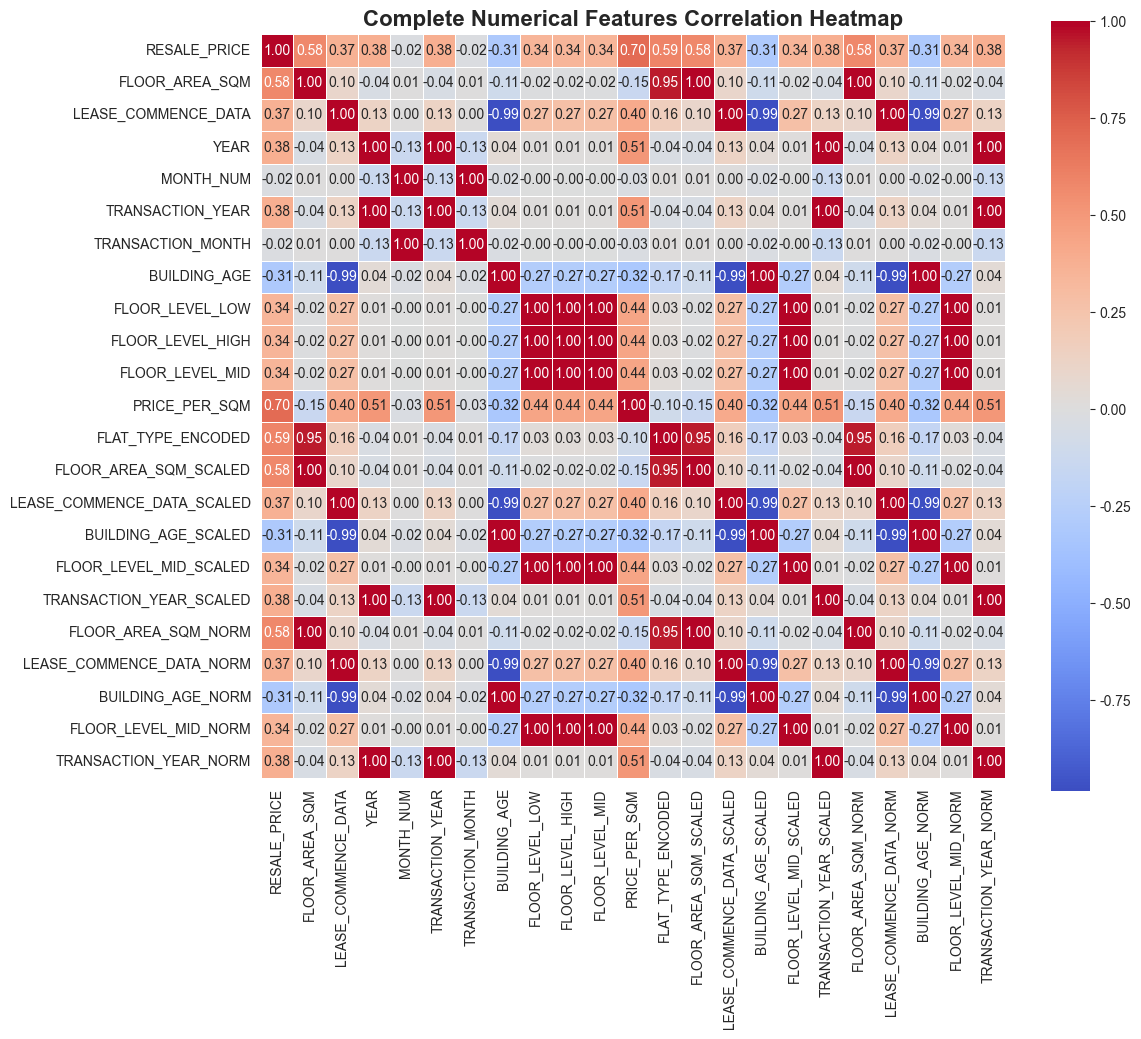

Correlation Matrix:
                            RESALE_PRICE  FLOOR_AREA_SQM  LEASE_COMMENCE_DATA  \
RESALE_PRICE                    1.000000        0.578110             0.368591   
FLOOR_AREA_SQM                  0.578110        1.000000             0.099533   
LEASE_COMMENCE_DATA             0.368591        0.099533             1.000000   
YEAR                            0.382053       -0.042396             0.129709   
MONTH_NUM                      -0.017999        0.005404             0.000948   
TRANSACTION_YEAR                0.382053       -0.042396             0.129709   
TRANSACTION_MONTH              -0.017999        0.005404             0.000948   
BUILDING_AGE                   -0.305490       -0.107608            -0.985258   
FLOOR_LEVEL_LOW                 0.341653       -0.015026             0.272163   
FLOOR_LEVEL_HIGH                0.341653       -0.015026             0.272163   
FLOOR_LEVEL_MID                 0.341653       -0.015026             0.272163   
PRICE_PE

In [21]:
# 2.3 Correlation Analysis
print("\n2.3 Numerical Features Correlation Analysis")
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_processed[numeric_cols].corr()

# 重新排序列，使RESALE_PRICE位于对角线上（第一列和第一行）
if 'RESALE_PRICE' in correlation_matrix.columns:
    cols_reordered = ['RESALE_PRICE'] + [col for col in correlation_matrix.columns if col != 'RESALE_PRICE']
    correlation_matrix = correlation_matrix.loc[cols_reordered, cols_reordered]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Complete Numerical Features Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

print("\n--- Analysis of Correlations ---")

